# Certificate in Data Science | Milestone 4 |  
- Final Project  

> University of Washington  
> October 2019  
> N. HICKS

## Project Guidance and Instructions
Milestone 4 is where everything you built in the previous milestones comes together. For this Milestone, you focus on improving model accuracy and summarizing your findings. Try explaining your findings as if you are presenting to your management team in layman’s terms. For example, talk about the influencing factors, what can be improved, what is important in your findings, what is the key aspect to focus on, what do the data tell them that they do not know.  
<br>  
> 1. update Milestones 1 through 3, and assignment 9 based on feedback;  
> <br>  
> 2. enhance your model results by trying different model and/or data enhancement techniques (Build 3 models with different enhancements and feature engineering techniques);  
> <br>  
> 3. explain your choice of model and model accuracy; and  
> <br>  
> 4. draw direct inferences and conclusions from model results (describe how your model results can improve or provide a solution to the problem you have chosen). Use graphs and evidence from the data to prove your point. Part of being a data scientist is to tell a story that helps the business.

## Problem Statement

> The Washington King County housing dataset, that includes the area of Seattle, reflects data derived from housing surveys conducted between May 2014 and May 2015. The dataset contains 19 features describing various aspects of a housing unit that might reflect redeeming qualities effecting resale value. Approximately 22,000 samples are made available herein for analysis.  
<br>
> As a housing construction contractor it is critical to achieve profit for every home sales opportunity. In this way, the need exists to identify those housing unit features that help to drive profit increase for every home property sale and / or renovation.

## Import Libraries

In [1]:
'''
Load the necessary libraries.
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import preprocessing
import statsmodels.formula.api as sm

## Functions for Scripting

In [2]:
'''
Set the resultant plot parameters.
RETURN: none.
'''
%matplotlib inline

# set for all notebook; width, height of the resulting plots
plt.rcParams["figure.figsize"] = [10, 7]

# set the boxplot marker specification
markerType = dict(marker='s', markeredgecolor='black', markerfacecolor='g', markersize=6)
sns.set()

In [3]:
'''
Retrieve the prescribed dataset.
RETURN: pd.DataFrame
'''
def fetch_data(path, file):
    try:
        # import the file to a dataframe
        _df = pd.read_csv(path+file, index_col=0)
        print('REMOTE FILE USED')
    except:
        # Local Copy -- Link would not permit access
        path = os.getcwd()
        print('LOCAL FILE USED;\nREMOTE SERVER NOT REACHABLE\n--> [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:590)\n\n')
        # import the file to a dataframe
        _df = pd.read_csv(os.path.join(path,file), index_col=0)
    
    return _df

In [4]:
'''
Normalize a specified feature.
RETURN: np.array
'''
def get_normFeature(pdSeries):
    x_array = np.array(pdSeries)
    normalized_X = preprocessing.normalize([x_array])
    return normalized_X

In [5]:
'''
Calculate the log of the specified feature.
RETURN: pd.DataFrame
'''
def logFeature(df, feature):
    logList = np.log(df[feature])
    log_name = feature + '_log'
    try:
        df.insert(loc=2, column=log_name, value=logList)
    except:
        print('Feature \'{}\' already exists.'.format(log_name))
    return df

In [6]:
'''
Create a scale function for a single feature.
RETURN: standard deviation of the feature (magnitude)
'''
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

## Import the Data

In [7]:
path = 'https://library.startlearninglabs.uw.edu//DATASCI410//Datasets//'
file = 'kc_house_data.csv'
abode_df = fetch_data(path, file)
abode_df.head()

LOCAL FILE USED;
REMOTE SERVER NOT REACHABLE
--> [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:590)




,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data Exploration

### Assess Features - Price

PRICE
10749 homes sold above the median sales price of $450000.

1465 homes sold above $1-million.


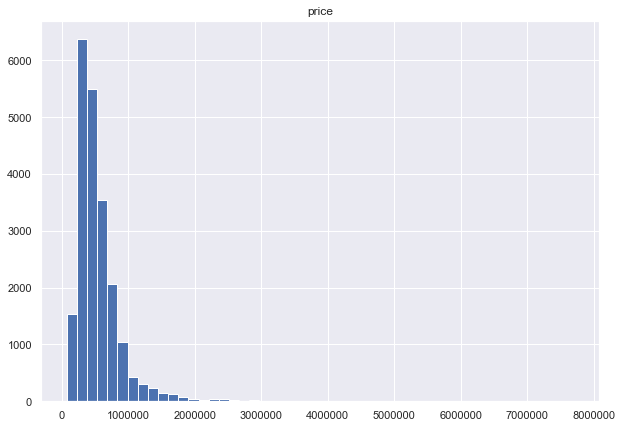

In [8]:
'''
Visualize the 'price' and 'price_log' features via histogram.
Observe the improved logarithmic behavior that reflects normal Gaussian distribution charcateristics.
'''
abode_df.hist(column=['price'], bins=50)
plt.show


'''
Discover specific attributes of the sales price.
'''
vals = abode_df['price'].values
median = np.median(vals)

result = vals > median
print('PRICE\n{} homes sold above the median sales price of ${}.\n'.format(np.sum(result), int(median)))
result = vals > 10**6
print('{} homes sold above $1-million.'.format(np.sum(result), ',d'))

### Assess Feature - Bedrooms

BEDROOMS
8817 homes sold that have above the median number of 3.0 floors.

The data appears normally distributed, with the largest number of bedrooms at 33.


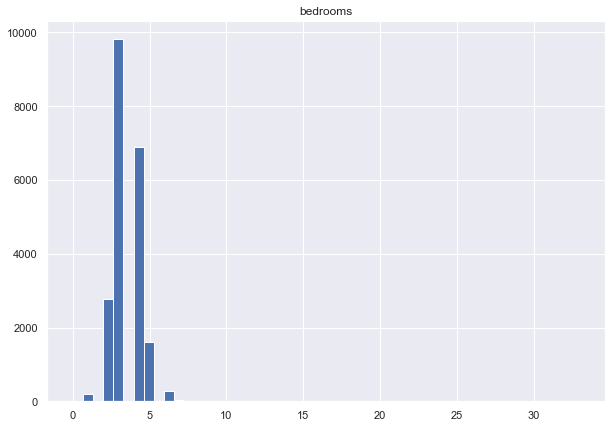

In [9]:
'''
Visualize the 'bedrooms' feature via histogram.
'''
abode_df.hist(column=['bedrooms'], bins=50)
plt.show


'''
Discover specific attributes of the sales bedrooms.
'''
vals = abode_df['bedrooms'].values
median = np.median(vals)

result = vals > median
print('BEDROOMS\n{} homes sold that have above the median number of {} floors.\n'.format(np.sum(result), median))
print('The data appears normally distributed, with the largest number of bedrooms at {}.'.format(np.max(vals)))

### Assess Feature - Bathrooms

BATHROOMS
9195 homes were sold that have above the median of 2.25 bathrooms,
and with a mean of 2.11 bathrooms.

This result is nearly normal in distribution, even with the small tail to the right.


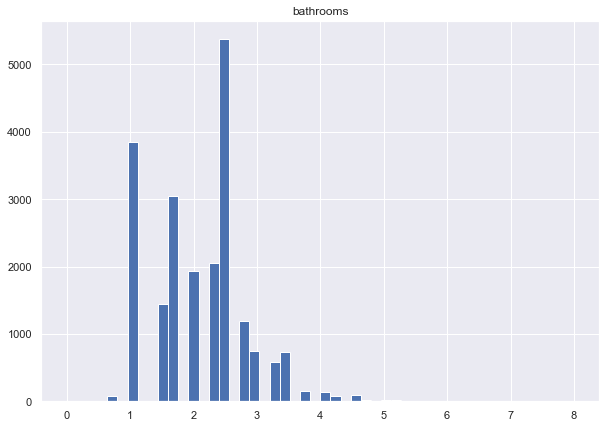

In [10]:
'''
Visualize the 'bathrooms' features via histogram.
Observe the small tail of the distribution.
'''
abode_df.hist(column=['bathrooms'], bins=50)
plt.show


'''
Discover specific attributes of the sales bedrooms.
'''
vals = abode_df['bathrooms'].values
median = np.median(vals)
mean = np.mean(vals)

result = vals > median
print('BATHROOMS\n{} homes were sold that have above the median of {} bathrooms,'.format(np.sum(result), median))
print('and with a mean of {} bathrooms.\n'.format(round(mean, 2)))
print('This result is nearly normal in distribution, even with the small tail to the right.')

### Assess Features - sqft_living, sqft_lot

LIVING SPACE
10793 homes sold that have above the median of 1910 square feet of living space,
with the smallest living space at 290 square feet, and the largest at 13540 square feet.

LOT SPACE
10806 homes sold that have above the median of 7618 square feet of lot size,
with the smallest lot size at 520 square feet, and the largest at 1651359 square feet.

Notice the long tail to the right of the distribution for the 'sqft_lot' feature.


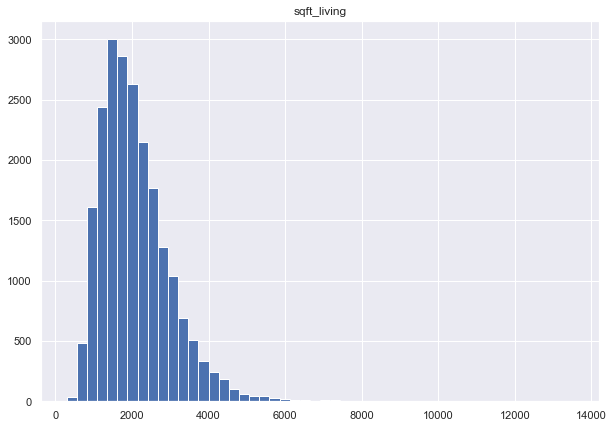

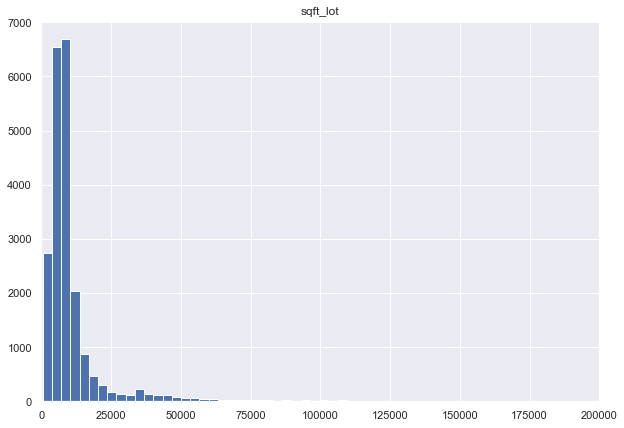

In [11]:
'''
Visualize the 'sqft_living' and 'sqft_lot' features via histogram.
'''
abode_df.hist(column=['sqft_living'], bins=50)
abode_df.hist(column=['sqft_lot'], bins=500)
plt.xlim(0,200000)
plt.show


'''
Discover specific attributes of the sales bedrooms.
'''
vals = abode_df['sqft_living'].values
median = np.median(vals)
min_space = np.min(abode_df['sqft_living'])
max_space = np.max(abode_df['sqft_living'])

result = vals > median
print('LIVING SPACE\n{} homes sold that have above the median of {} square feet of living space,'.format(np.sum(result), int(median)))
print('with the smallest living space at {} square feet, and the largest at {} square feet.\n'.format(min_space, max_space))
vals = abode_df['sqft_lot'].values
median = np.median(vals)
result = vals > median
min_space = np.min(abode_df['sqft_lot'])
max_space = np.max(abode_df['sqft_lot'])

print('LOT SPACE\n{} homes sold that have above the median of {} square feet of lot size,'.format(np.sum(result), int(median)))
print('with the smallest lot size at {} square feet, and the largest at {} square feet.\n'.format(min_space, max_space))
print('Notice the long tail to the right of the distribution for the \'sqft_lot\' feature.')

### Assess Feature - Floors

FLOORS
9023 homes were sold that have above the median of 1.5 floors,
with a mean of 1.49 floors.

10680 homes sold had 1 floor.
1910 homes sold had 1.5 floors.
8241 homes sold had 2 floors.

Observe that the distribution of data is considered normal, where the median and mean values are nearly identical.


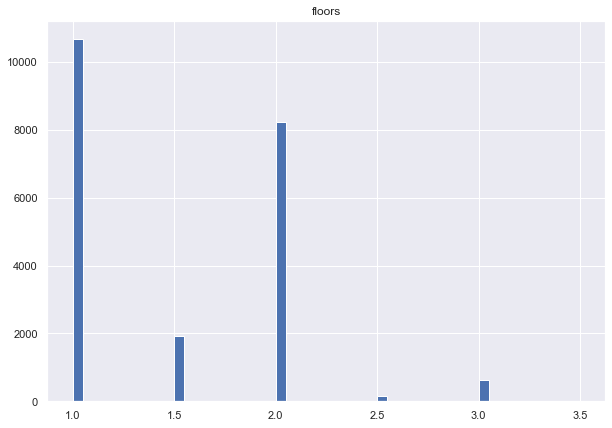

In [12]:
'''
Visualize the 'floors' features via histogram.
Observe the small tail of the distribution.
'''
abode_df.hist(column=['floors'], bins=50)
plt.show


'''
Discover specific attributes of the sales bedrooms.
'''
vals = abode_df['floors'].values
median = np.median(vals)
mean = np.mean(vals)

result = vals > median
result_1 = (vals == 1)
result_15 = (vals == 1.5)
result_2 = (vals == 2)
print('FLOORS\n{} homes were sold that have above the median of {} floors,'.format(np.sum(result), median))
print('with a mean of {} floors.\n'.format(round(mean, 2)))
print('{} homes sold had 1 floor.'.format(np.sum(result_1)))
print('{} homes sold had 1.5 floors.'.format(np.sum(result_15)))
print('{} homes sold had 2 floors.\n'.format(np.sum(result_2)))
print('Observe that the distribution of data is considered normal, where the median and mean values are nearly identical.')

### Assess Feature - Waterfront

WATERFRONT
163 homes have a waterfront view,
while 21450 homes do not have a waterfront view.

As observed, the 'waterfront' feature is imbalanced; it is unlikely to provide further benefit to this analysis,
in that, any resulting model based on this feature will have a biased prediction outcome.


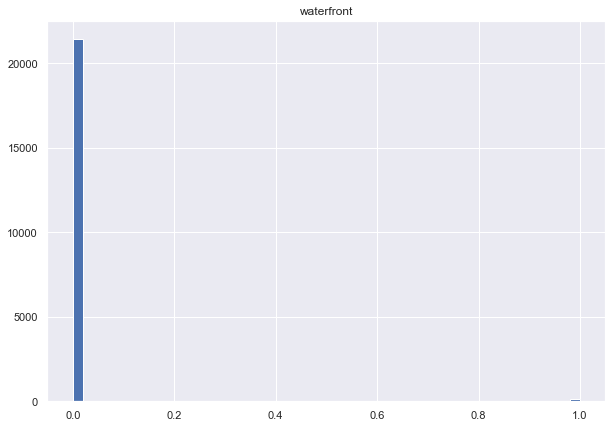

In [13]:
'''
Visualize the 'waterfront' features via histogram.
Observe the small tail of the distribution.
'''
abode_df.hist(column=['waterfront'], bins=50)
plt.show


'''
Discover specific attributes of the sales waterfront.
'''
vals = abode_df['waterfront'].values
view_yes = (vals==1)
view_no = (vals==0)
print('WATERFRONT\n{} homes have a waterfront view,'.format(np.sum(view_yes)))
print('while {} homes do not have a waterfront view.\n'.format(np.sum(view_no)))
print('As observed, the \'waterfront\' feature is imbalanced; it is unlikely to provide further benefit to this analysis,')
print('in that, any resulting model based on this feature will have a biased prediction outcome.')

### Assess Feature - Condition

CONDITION
Observe the data is normally distributed with a median of 3.0,
and a mean of 3.41, where a 'best condition' is a magnitude of 5.0


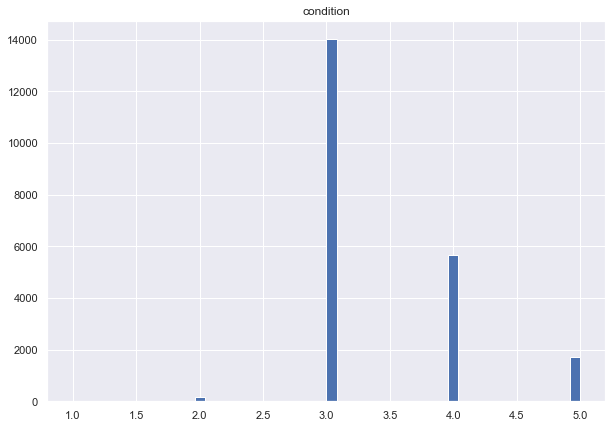

In [14]:
'''
Visualize the 'condition' features via histogram.
Observe the small tail of the distribution.
'''
abode_df.hist(column=['condition'], bins=50)
plt.show


'''
Discover specific attributes of the sales condition.
'''
mean = np.mean(abode_df['condition'])
median = np.median(abode_df['condition'])
print('CONDITION\nObserve the data is normally distributed with a median of {},'.format(round(np.sum(median),2)))
print('and a mean of {}, where a \'best condition\' is a magnitude of 5.0'.format(round(np.sum(mean),2)))

### Assess Feature - Grade

GRADE
Observe the data is normally distributed with a median of 7.0,
and a mean of 7.66.

Both the median and mean indicate an 'average' construction grade of the homes purchased.


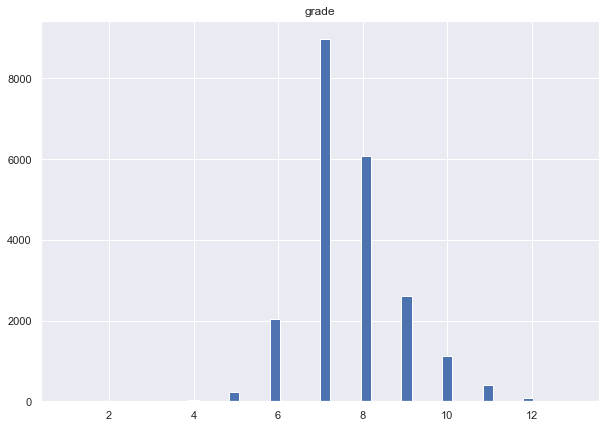

In [15]:
'''
Visualize the 'grade' features via histogram.
Observe the small tail of the distribution.
'''
abode_df.hist(column=['grade'], bins=50)
plt.show


'''
Discover specific attributes of the grade.
'''
mean = np.mean(abode_df['grade'])
median = np.median(abode_df['grade'])
print('GRADE\nObserve the data is normally distributed with a median of {},'.format(round(np.sum(median),2)))
print('and a mean of {}.\n'.format(round(np.sum(mean),2)))
print('Both the median and mean indicate an \'average\' construction grade of the homes purchased.')

### Assess Feature - View

VIEW
Observe the data is NOT normally distributed with a median of 0.0,
and a mean of 0.23.

This result indicates that this feature is likely not useful, primarily because most of the houses do not have a view.

Equally, there is ambiguity surrounding the meaning of this feature,
whether or not it speaks to the actual property view,
or if it indicates the magnitude of property showings (in order to sell it).


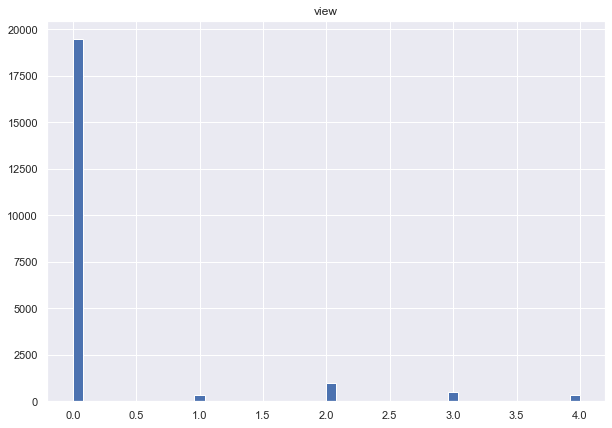

In [16]:
'''
Visualize the 'view' features via histogram.
Observe the small tail of the distribution.
'''
abode_df.hist(column=['view'], bins=50)
plt.show


'''
Discover specific attributes of the sales condition.
'''
mean = np.mean(abode_df['view'])
median = np.median(abode_df['view'])
print('VIEW\nObserve the data is NOT normally distributed with a median of {},'.format(round(np.sum(median),2)))
print('and a mean of {}.\n'.format(round(np.sum(mean),2)))
print('This result indicates that this feature is likely not useful, primarily because most of the houses do not have a view.\n')
print('Equally, there is ambiguity surrounding the meaning of this feature,')
print('whether or not it speaks to the actual property view,\nor if it indicates the magnitude of property showings (in order to sell it).')

### Assess Features - Sqft_basement, Sqft_above

SQFT_BASEMENT
Observe the data is NOT normally distributed with a median of 0.0,
and a mean of 291.51.

For those houses with basements, the feature IS normally distrubted with a median of 700.0
and a mean of 742.36.

There are a couple of concerns with using this feature for building a model:
   1. Of the 3 features conatined within the original dataset, 'sqft_living', 'sqft_basement', and 'sqft_above',
      the prior 2 are additively equivalent to the latter. Thus, the 2 redundant features should be removed from the analysis.
   2. Per the histogram, the majority of houses do not have a basement.
      Therefore, any analysis based on feature 'sqft_basement' will yield biased results.


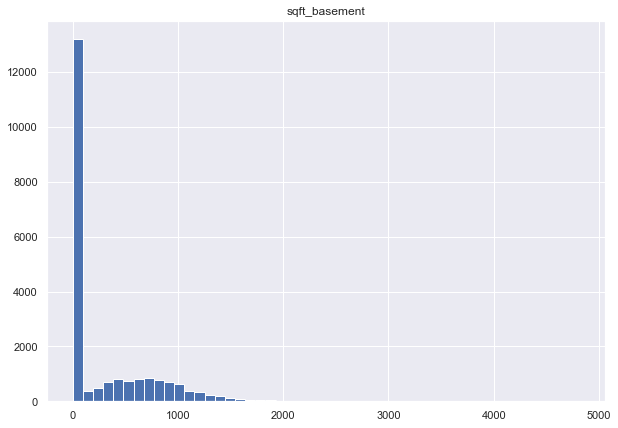

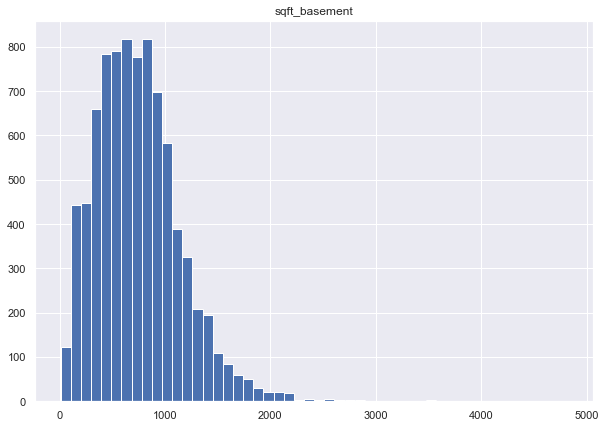

In [17]:
'''
Visualize the 'sqft_basement' features via histogram.
Observe the small tail of the distribution.
'''
abode_df.hist(column=['sqft_basement'], bins=50)
plt.show


'''
Discover specific attributes of the sales condition.
'''
vec = abode_df['sqft_basement']
mean = np.mean(vec)
median = np.median(vec)
print('SQFT_BASEMENT\nObserve the data is NOT normally distributed with a median of {},'.format(round(np.sum(median),2)))
print('and a mean of {}.\n'.format(round(np.sum(mean),2)))
result_true = vec>0
result = abode_df[result_true]
vec2 = result['sqft_basement'].values
mean_result = np.mean(vec2)
median_result = np.median(vec2)
print('For those houses with basements, the feature IS normally distrubted with a median of {}'.format(round(median_result,2)))
print('and a mean of {}.\n'.format(round(mean_result,2)))


'''
Visualize the 'sqft_basement' features via histogram.
Observe the small tail of the distribution.
'''
result.hist(column=['sqft_basement'], bins=50)
plt.show

print('There are a couple of concerns with using this feature for building a model:')
print('   1. Of the 3 features conatined within the original dataset, \'sqft_living\', \'sqft_basement\', and \'sqft_above\',')
print('      the prior 2 are additively equivalent to the latter. Thus, the 2 redundant features should be removed from the analysis.')
print('   2. Per the histogram, the majority of houses do not have a basement.')
print('      Therefore, any analysis based on feature \'sqft_basement\' will yield biased results.')

### Assess Feature - Year Built

YEAR BUILT
The houses purchased were constructed in the median year 1975,
with a mean of construction build of 1971.

The observed distribution does not appear to have any Gaussian characteristics.


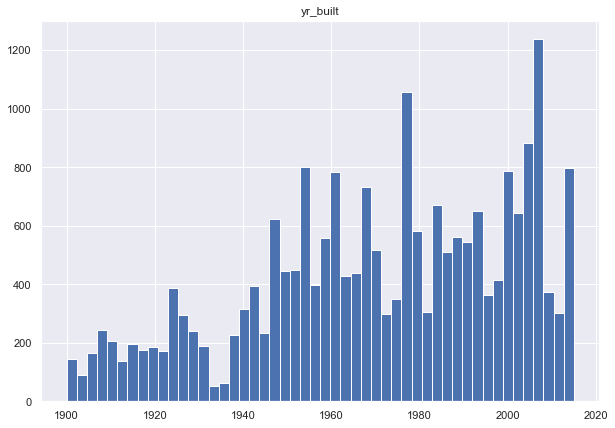

In [18]:
'''
Visualize the 'view' features via histogram.
Observe the small tail of the distribution.
'''
abode_df.hist(column=['yr_built'], bins=50)
plt.show


'''
Discover specific attributes of the sales condition.
'''
mean = np.mean(abode_df['yr_built'])
median = np.median(abode_df['yr_built'])
print('YEAR BUILT\nThe houses purchased were constructed in the median year {},'.format(int(np.sum(median))))
print('with a mean of construction build of {}.\n'.format(int(np.sum(mean))))
print('The observed distribution does not appear to have any Gaussian characteristics.')

### Assess Feature - Year Renovated

YEAR RENOVATED
Observe that the feature is biased with a median of 0,
and a mean of 84.

In the histogram shown, the presumption is that '0' values indicate houses that have not had any type of renovations.

Only 914 houses have reported renovations,
that is in-fact an underwhelming outcome per the 21613 total samples contained within this study.



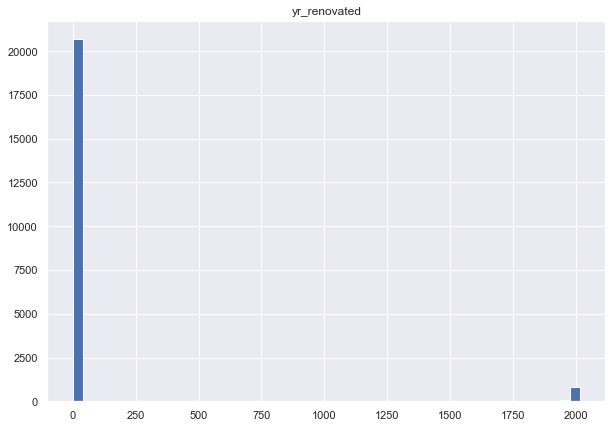

In [19]:
'''
Visualize the 'yr_renovated' features via histogram.
Observe the small tail of the distribution.
'''
abode_df.hist(column=['yr_renovated'], bins=50)
plt.show


'''
Discover specific attributes of the sales condition.
'''
vec = abode_df['yr_renovated']
mean = np.mean(vec)
median = np.median(vec)
result = vec>0
print('YEAR RENOVATED\nObserve that the feature is biased with a median of {},'.format(int(np.sum(median))))
print('and a mean of {}.\n'.format(int(np.sum(mean))))
print('In the histogram shown, the presumption is that \'0\' values indicate houses that have not had any type of renovations.\n')
print('Only {} houses have reported renovations,\nthat is in-fact an underwhelming outcome per the {} total samples contained within this study.\n'.format(np.sum(result), abode_df.shape[0]))

### Assess Feature - Zipcode

ZIPCODE
There are 70 zipcode designations that the house purchase data is based upon.

In preperation for model development, and in order to utilize the 'zipcode' feature,
it is necessary then to encode these 70 categorical values into binary ones.

Each of these additions consequently becomes a new feature,
and the model development attempt would become untenable and overly complex.

Thus, the 'zipcode' feature will be negated for future analysis.


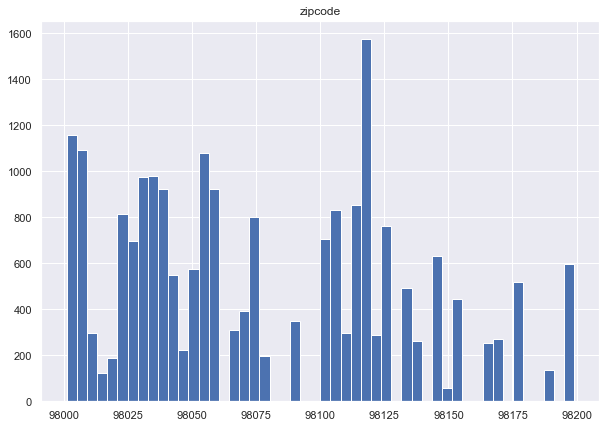

In [20]:
'''
Visualize the 'zipcode' features via histogram.
Observe the small tail of the distribution.
'''
abode_df.hist(column=['zipcode'], bins=50)
plt.show


'''
Discover specific attributes of the sales condition.
'''
vec = abode_df['zipcode']

print('ZIPCODE\nThere are {} zipcode designations that the house purchase data is based upon.\n'.format(len(vec.unique())))
print('In preperation for model development, and in order to utilize the \'zipcode\' feature,')
print('it is necessary then to encode these {} categorical values into binary ones.\n'.format(len(vec.unique())))
print('Each of these additions consequently becomes a new feature,')
print('and the model development attempt would become untenable and overly complex.\n')
print('Thus, the \'zipcode\' feature will be negated for future analysis.')

### Assess Features - Longitude, Latitude

LATITUDE & LONGITUDE
Although each of the 'lat', 'long' features is of high precision, this does not make it useful.
Equally, the 'zipcode' feature already contains the same information, though at a lesser resolution.

Therefore, as previously determined for feature 'zipcode',
these 2 features are likewise not useful for developing a simple analytics approach.


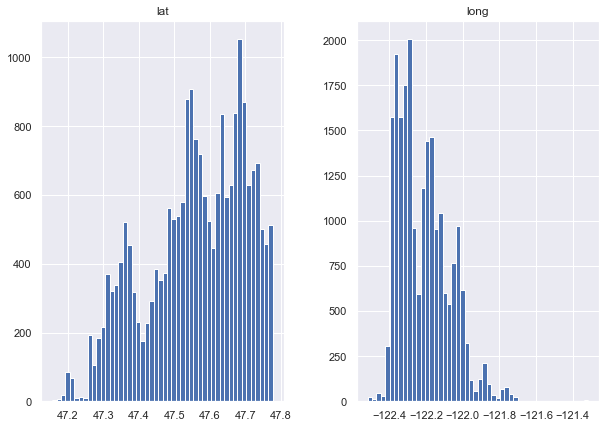

In [21]:
'''
Visualize the 'zipcode' features via histogram.
Observe the small tail of the distribution.
'''
abode_df.hist(column=['lat', 'long'], bins=50)
plt.show


'''
Discover specific attributes of the sales condition.
'''
print('LATITUDE & LONGITUDE\nAlthough each of the \'lat\', \'long\' features is of high precision, this does not make it useful.')
print('Equally, the \'zipcode\' feature already contains the same information, though at a lesser resolution.\n')
print('Therefore, as previously determined for feature \'zipcode\',')
print('these 2 features are likewise not useful for developing a simple analytics approach.')

### Assess Features - Sqft_living15, Sqft_lot15

In [22]:
abode_df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

SQFT_LIVING_15
The feature is normally distributed with a median of 1840.0 square feet,
and a mean of 1986.55 square feet.

SQFT_LOT_15
The feature has a median of 7620.0 square feet,
and a mean of 12768.46 square feet.

SQFT_LIVING
The feature has a median of 1910.0 square feet,
and a mean of 2079.9 square feet.

SQFT_LOT
The feature is normally distributed with a median of 7618.0 square feet,
and a mean of 15106.97 square feet.

DIFFERENCES
The differences between the 'sqft_living' vs. 'sqft_living_15',
and the 'sqft_lot' vs. 'sqft_lot_15' features, respectively, is 70.0 square feet and 2.0 square feet.

These results, based upon the consecutive years from 2014 to 2015, do not reflect significant change.
Therefore, these 2 features are neglected in the upcoming analysis, for not conveying realistic information.


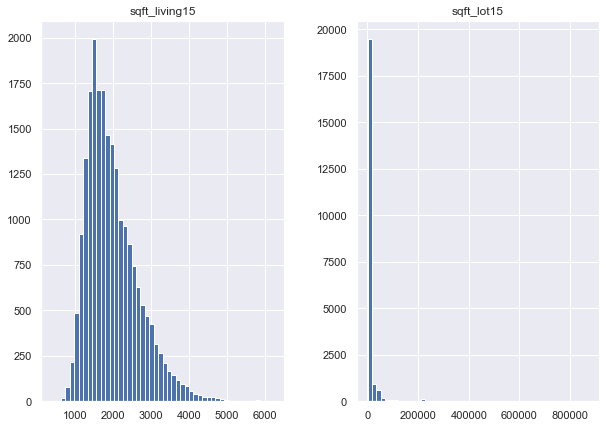

In [23]:
'''
Visualize the 'zipcode' features via histogram.
Observe the small tail of the distribution.
'''
abode_df.hist(column=['sqft_living15', 'sqft_lot15'], bins=50)
plt.show


'''
Discover specific attributes of the sales condition.
'''
mean_living_15 = np.mean(abode_df['sqft_living15'])
median_living_15 = np.median(abode_df['sqft_living15'])
#--------
mean_lot_15 = np.mean(abode_df['sqft_lot15'])
median_lot_15 = np.median(abode_df['sqft_lot15'])
print('SQFT_LIVING_15\nThe feature is normally distributed with a median of {} square feet,'.format(round(np.sum(median_living_15),2)))
print('and a mean of {} square feet.\n'.format(round(np.sum(mean_living_15),2)))
print('SQFT_LOT_15\nThe feature has a median of {} square feet,'.format(round(np.sum(median_lot_15),2)))
print('and a mean of {} square feet.\n'.format(round(np.sum(mean_lot_15),2)))

mean_living = np.mean(abode_df['sqft_living'])
median_living = np.median(abode_df['sqft_living'])
#--------
mean_lot = np.mean(abode_df['sqft_lot'])
median_lot = np.median(abode_df['sqft_lot'])
print('SQFT_LIVING\nThe feature has a median of {} square feet,'.format(round(np.sum(median_living),2)))
print('and a mean of {} square feet.\n'.format(round(np.sum(mean_living),2)))
print('SQFT_LOT\nThe feature is normally distributed with a median of {} square feet,'.format(round(np.sum(median_lot),2)))
print('and a mean of {} square feet.\n'.format(round(np.sum(mean_lot),2)))

median_diff_living = np.abs(median_living_15 - median_living)
median_diff_lot = np.abs(median_lot_15 - median_lot)
print('DIFFERENCES\nThe differences between the \'sqft_living\' vs. \'sqft_living_15\',')
print('and the \'sqft_lot\' vs. \'sqft_lot_15\' features, respectively, is {} square feet and {} square feet.\n'.format(median_diff_living, median_diff_lot))
print('These results, based upon the consecutive years from 2014 to 2015, do not reflect significant change.')
print('Therefore, these 2 features are neglected in the upcoming analysis, for not conveying realistic information.')

## Analysis Methodology

> Preparing the dataset based upon the above discussion, the following features will be dropped from the forthcoming analysis:  
>     - waterfront  
>     - view  
>     - sqft_above
>     - sqft_basement
>     - yr_renovated
>     - long
>     - lat
>     - sqft_living15
>     - sqft_lot15  
>     - zipcode
<br>  
> Of most significance thus far from the above work accomplished, we observe that a correlation between the 2 features of 'sqft_living' and 'sqft_lot' can be identified. This is an interesting aspect of the problem statement, because depending on population density of the King County Housing dataset, it can be surmized that string predictions may be derived from these features, as the lot size may in fact drive the number of floors upward, and consequently the house price increases in kind.  
<br>  
> The intention then, is to establish an analysis employing multivariate linear regression models sans the above features, so as to simplify the applied model and therefor coaxing improved results that have predictive power of home sales prices based upon the most important of the features only.  

## Data Preparation

### Establish dtype Features - Date

In [24]:
'''
Establish the date feature as DATE-TIME dtype.
'''
abode_df['date'] = pd.to_datetime(abode_df['date'])
abode_df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113


In [25]:
'''
Check if there exist any 'NaN' entries for all features.
'''
print(abode_df.isna().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [26]:
'''
Verify dataset feature dtypes are as required.
'''
abode_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(14)
memory usage: 3.5 MB


### Remove Outlier Data - Bedrooms

In [27]:
'''
Filter the outlier data from 'bedrooms'.
'''
print('Original Feature: {}'.format(sorted(abode_df['bedrooms'].unique())))
is_notOut = abode_df['bedrooms']<=11
abode_df = abode_df[is_notOut]
abode_df.reset_index()
print('Filtered Feature: {}'.format(sorted(abode_df['bedrooms'].unique())))

Original Feature: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]
Filtered Feature: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


### Establish Log Features - Price

In [28]:
'''
Accomplish feature engineering outcomes.
'''
abode_df = logFeature(abode_df, 'price')
abode_df.describe()

,price,price_log,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,5.400835e+05,13.047802,3.369471,2.114774,2079.921016,1.510739e+04,1.494332,0.007542,0.234314,3.409356,7.656904,1788.425319,291.495697,1971.006247,84.406163,98077.938645,47.560047,-122.213891,1986.582871,12768.828984
std,3.671351e+05,0.526692,0.907982,0.770177,918.456818,4.142142e+04,0.539991,0.086519,0.766334,0.650668,1.175477,828.094487,442.580931,29.373636,401.688123,53.505993,0.138564,0.140829,685.392610,27304.756179
min,7.500000e+04,11.225243,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.218375e+05,12.681802,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,13.017003,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,13.377006,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,7.700000e+06,15.856731,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Drop Prescribed Features

In [29]:
'''
Drop the prescribed features.
'''
drop_df = abode_df.copy(deep=True)
drop_features = ['waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'long', 'lat', 'sqft_living15', 'sqft_lot15', 'zipcode']
drop_df = drop_df.drop(drop_features, axis=1)
drop_df.head(10)

,date,price,price_log,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
id,,,,,,,,,,,
7129300520,2014-10-13,221900.0,12.309982,3,1.00,1180,5650,1.0,3,7,1955
6414100192,2014-12-09,538000.0,13.195614,3,2.25,2570,7242,2.0,3,7,1951
5631500400,2015-02-25,180000.0,12.100712,2,1.00,770,10000,1.0,3,6,1933
2487200875,2014-12-09,604000.0,13.311329,4,3.00,1960,5000,1.0,5,7,1965
1954400510,2015-02-18,510000.0,13.142166,3,2.00,1680,8080,1.0,3,8,1987
7237550310,2014-05-12,1225000.0,14.018451,4,4.50,5420,101930,1.0,3,11,2001
1321400060,2014-06-27,257500.0,12.458775,3,2.25,1715,6819,2.0,3,7,1995
2008000270,2015-01-15,291850.0,12.583995,3,1.50,1060,9711,1.0,3,7,1963
2414600126,2015-04-15,229500.0,12.343658,3,1.00,1780,7470,1.0,3,7,1960


### Normalize the Features

In [30]:
'''
Normalize the features to a copy of the original DataFrame.
'''
norm_df = drop_df.copy(deep=True)

features = norm_df.columns[1:]
print(features)

for feature in features:
    norm = get_normFeature(abode_df[feature]) # returns an array
    norm_df[feature] = norm[0].T
norm_df.head(10)

Index(['price', 'price_log', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'yr_built'],
      dtype='object')


,date,price,price_log,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
id,,,,,,,,,,,
7129300520,2014-10-13,0.002311,0.006412,0.005848,0.003022,0.003530,0.000872,0.004281,0.005879,0.006147,0.006746
6414100192,2014-12-09,0.005604,0.006874,0.005848,0.006800,0.007689,0.001117,0.008562,0.005879,0.006147,0.006732
5631500400,2015-02-25,0.001875,0.006303,0.003899,0.003022,0.002304,0.001543,0.004281,0.005879,0.005269,0.006670
2487200875,2014-12-09,0.006291,0.006934,0.007797,0.009067,0.005864,0.000771,0.004281,0.009799,0.006147,0.006781
1954400510,2015-02-18,0.005312,0.006846,0.005848,0.006045,0.005026,0.001247,0.004281,0.005879,0.007025,0.006857
7237550310,2014-05-12,0.012760,0.007302,0.007797,0.013601,0.016215,0.015726,0.004281,0.005879,0.009659,0.006905
1321400060,2014-06-27,0.002682,0.006490,0.005848,0.006800,0.005131,0.001052,0.008562,0.005879,0.006147,0.006884
2008000270,2015-01-15,0.003040,0.006555,0.005848,0.004534,0.003171,0.001498,0.004281,0.005879,0.006147,0.006774
2414600126,2015-04-15,0.002391,0.006430,0.005848,0.003022,0.005325,0.001152,0.004281,0.005879,0.006147,0.006764


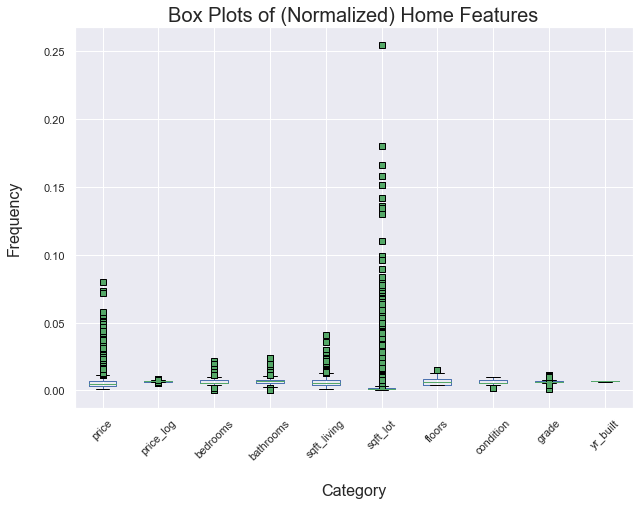

In [31]:
'''
Show the distribution characteristics of the normalized dataset features.
REQUIRES: plt.boxplot()
'''
fig = plt.figure() # Define plot area
ax = fig.gca() # Define axis

norm_features = norm_df.columns[1:]
norm_df.loc[:,norm_features].boxplot(flierprops=markerType, ax = ax)
ax.set_title('Box Plots of (Normalized) Home Features', fontsize=20)
ax.set_ylabel('Frequency\n', fontsize=16)
ax.set_xlabel('\nCategory', fontsize=16)
plt.xticks(rotation=45)
plt.show()

## Model Evaluations

### Scale the Data

In [32]:
'''
Scale individual features back to a copy of the original DataFrame.
'''
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'condition', 'grade', 'yr_built']

scale_df = drop_df.copy()
for feature in features:
    scale_df[feature] = scale(scale_df[feature])
scale_df.head(10)

,date,price,price_log,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
id,,,,,,,,,,,
7129300520,2014-10-13,221900.0,12.309982,-0.406924,-1.447460,-0.979841,-0.228326,-0.915466,-0.629146,-0.558853,-0.544931
6414100192,2014-12-09,538000.0,13.195614,-0.406924,0.175582,0.533602,-0.189891,0.936460,-0.629146,-0.558853,-0.681111
5631500400,2015-02-25,180000.0,12.100712,-1.508293,-1.447460,-1.426252,-0.123306,-0.915466,-0.629146,-1.409591,-1.293920
2487200875,2014-12-09,604000.0,13.311329,0.694446,1.149406,-0.130571,-0.244019,-0.915466,2.444688,-0.558853,-0.204482
1954400510,2015-02-18,510000.0,13.142166,-0.406924,-0.149027,-0.435437,-0.169660,-0.915466,-0.629146,0.291885,0.544506
7237550310,2014-05-12,1225000.0,14.018451,0.694446,3.097056,3.636705,2.096128,-0.915466,-0.629146,2.844099,1.021135
1321400060,2014-06-27,257500.0,12.458775,-0.406924,0.175582,-0.397329,-0.200104,0.936460,-0.629146,-0.558853,0.816865
2008000270,2015-01-15,291850.0,12.583995,-0.406924,-0.798243,-1.110498,-0.130283,-0.915466,-0.629146,-0.558853,-0.272572
2414600126,2015-04-15,229500.0,12.343658,-0.406924,-1.447460,-0.326556,-0.184387,-0.915466,-0.629146,-0.558853,-0.374707


### Establish the Regression Models

In [33]:
# Lasso Regression with a sequence of lambdas
# Generate a sequence of lambdas
log_lambda_seq = np.linspace(-6, 2, 50)
lambda_seq = np.exp(log_lambda_seq)

feature_set = 'bedrooms + bathrooms + sqft_living + sqft_lot + floors \
                + condition + grade + yr_built + 1'

formula = 'price_log ~ ' + feature_set

price_log = abode_df.loc[:,'price_log']

#### LASSO Regression

In [34]:
coeffs_array = []
rsq_array = []
for lamb in lambda_seq:
    lasso_model = sm.ols(formula, data=scale_df)
    lasso_result = lasso_model.fit_regularized(method='elastic_net', alpha=lamb, L1_wt=1.0)
    
    coeffs_array.append(list(lasso_result.params))
    lasso_predictions = lasso_result.fittedvalues
    lasso_residuals = [x - y for x, y in zip(np.squeeze(lasso_predictions), price_log)]

    SSR_lasso = np.sum(np.square(lasso_residuals))
    SST_lasso = np.sum(np.square(price_log - np.mean(price_log)))
    SSE_lasso = SST_lasso - SSR_lasso

    rsq_lasso = 1 - (SSR_lasso / SST_lasso)
    rsq_array.append(rsq_lasso)

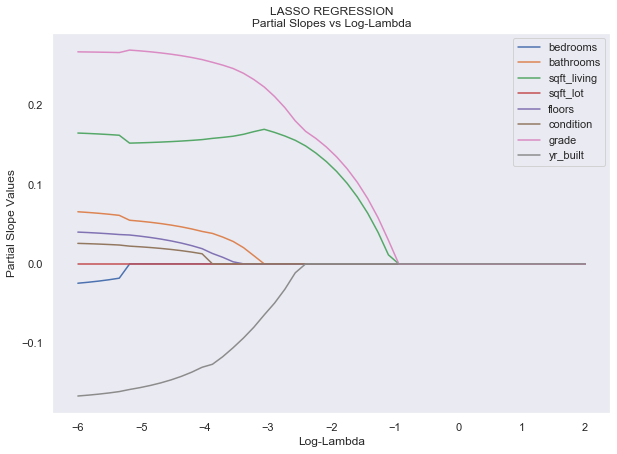

In [35]:
'''
Pull out partial slopes (drop intercept version)
'''
beta_coeffs = [x[1:] for x in coeffs_array]
plt.plot(log_lambda_seq, beta_coeffs)
plt.title('LASSO REGRESSION\nPartial Slopes vs Log-Lambda')
plt.ylabel('Partial Slope Values')
plt.xlabel('Log-Lambda')
plt.legend(labels=features)
plt.grid()

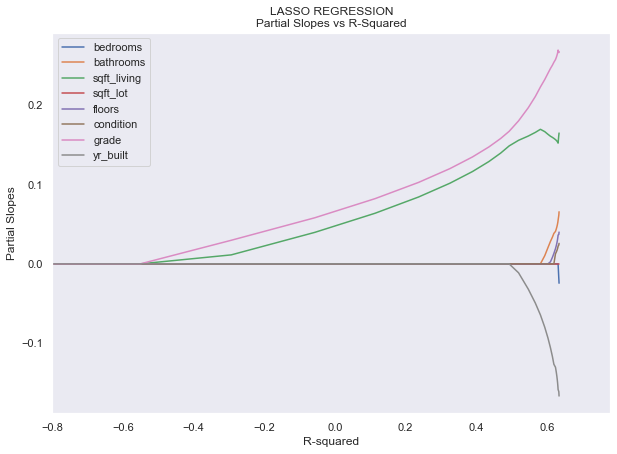

In [36]:
'''
Plot partial slopes vs R squared (% deviance explained)
'''
plt.plot(rsq_array, beta_coeffs)
plt.xlim([-0.8, 0.78])
plt.title('LASSO REGRESSION\nPartial Slopes vs R-Squared')
plt.ylabel('Partial Slopes')
plt.xlabel('R-squared')
plt.legend(labels=features)
plt.grid()

#### Ridge Regression

In [37]:
coeffs_array = []
rsq_array = []
for lamb in lambda_seq:
    ridge_model = sm.ols(formula, data=scale_df)
    ridge_result = ridge_model.fit_regularized(method='elastic_net', alpha=lamb, L1_wt=0.0)
    
    coeffs_array.append(list(ridge_result.params))
    ridge_predictions = ridge_result.fittedvalues
    ridge_residuals = [x - y for x, y in zip(np.squeeze(ridge_predictions), price_log)]

    SSR_ridge = np.sum(np.square(ridge_residuals))
    SST_ridge = np.sum(np.square(price_log - np.mean(price_log)))
    SSE_ridge = SST_ridge - SSR_ridge
    
    rsq_ridge = 1 - (SSR_ridge / SST_ridge)
    rsq_array.append(rsq_ridge)

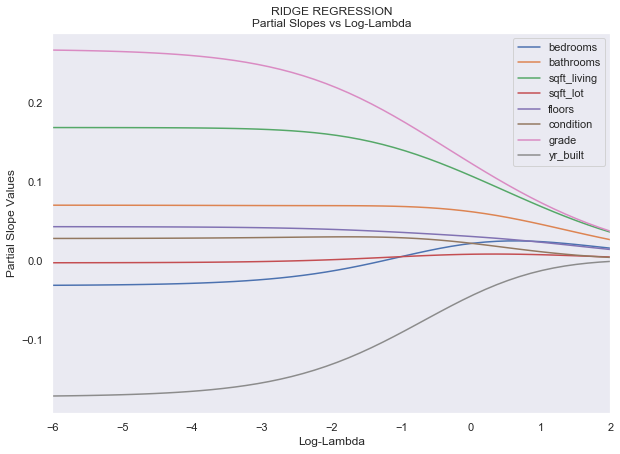

In [38]:
# Pull out partial slopes (drop intercept version)
beta_coeffs = [x[1:] for x in coeffs_array]
plt.plot(log_lambda_seq, beta_coeffs)
plt.xlim([-6.0, 2.0])
plt.title('RIDGE REGRESSION\nPartial Slopes vs Log-Lambda')
plt.ylabel('Partial Slope Values')
plt.xlabel('Log-Lambda')
plt.legend(labels=features)
plt.grid()

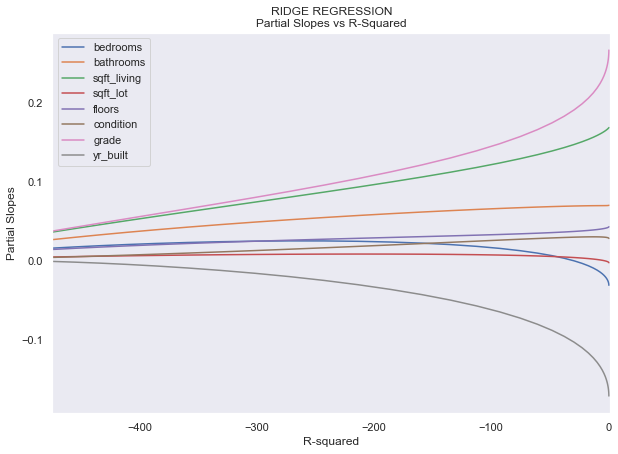

In [39]:
# Plot partial slopes vs R squared (% deviance explained)
plt.plot(rsq_array, beta_coeffs)
plt.xlim([-475, 2])
plt.title('RIDGE REGRESSION\nPartial Slopes vs R-Squared')
plt.ylabel('Partial Slopes')
plt.xlabel('R-squared')
plt.legend(labels=features)
plt.grid()

#### Elastic-Net Regression

In [40]:
coeffs_array = []
rsq_array = []
for lamb in lambda_seq:
    elastic_model = sm.ols(formula, data=scale_df)
    elastic_result = elastic_model.fit_regularized(method='elastic_net', alpha=lamb, L1_wt=0.15)
    
    coeffs_array.append(list(elastic_result.params))
    elastic_predictions = elastic_result.fittedvalues
    elastic_residuals = [x - y for x, y in zip(np.squeeze(elastic_predictions), price_log)]

    SSR_elastic = np.sum(np.square(elastic_residuals))
    SST_elastic = np.sum(np.square(price_log - np.mean(price_log)))
    SSE_elastic = SST_elastic - SSR_elastic
    
    rsq_elastic = 1 - (SSR_elastic / SST_elastic)
    rsq_array.append(rsq_elastic)

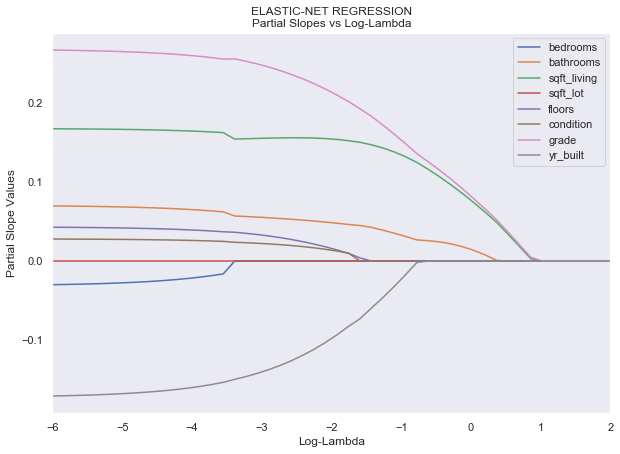

In [41]:
# Pull out partial slopes (drop intercept version)
beta_coeffs = [x[1:] for x in coeffs_array]
plt.plot(log_lambda_seq, beta_coeffs)
plt.xlim([-6.0, 2.0])
plt.title('ELASTIC-NET REGRESSION\nPartial Slopes vs Log-Lambda')
plt.ylabel('Partial Slope Values')
plt.xlabel('Log-Lambda')
plt.legend(labels=features)
plt.grid()

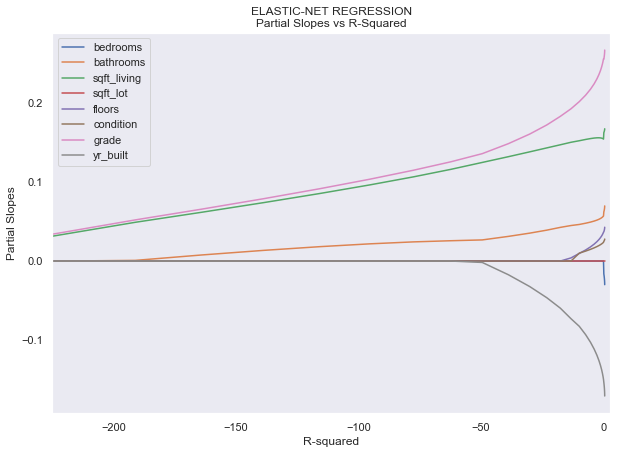

In [42]:
# Plot partial slopes vs R squared (% deviance explained)
plt.plot(rsq_array, beta_coeffs)
plt.xlim([-225, 3.0])
plt.title('ELASTIC-NET REGRESSION\nPartial Slopes vs R-Squared')
plt.ylabel('Partial Slopes')
plt.xlabel('R-squared')
plt.legend(labels=features)
plt.grid()

## Model Analysis

In [43]:
'''
Return the model accuracy measures.
'''
print('| RESULTS OF THE LINEAR REGRESSION MODELS ANALYSED |\n')
print('       LASSO       RIDGE     ELASTIC-NET')
#     the Sum of Squared Residuals-
#     a measure of the discrepancy between the data and an estimation model.   
print('SSR:  {}     {}      {}'.format(int(SSR_lasso), int(SSR_ridge), int(SSR_elastic)))
#     the Sum of Squared Totals-
#     the sum, over all observations, of the squared differences of each observation from the overall mean.   
print('SST:  {}        {}         {}'.format(int(SST_lasso), int(SST_ridge), int(SST_elastic)))
#     the Sum of Squared Errors-
#     the sum of the squares of the deviations of the predicted values from the mean value of a response variable.   
print('SSE:  {}    {}     {}'.format(int(SSE_lasso), int(SSE_ridge), int(SSE_elastic)))
#     the R-squared value-
#     a measure of how well observed outcomes are replicated by the model,
#     based on the proportion of total variation of outcomes explained by the model.
print('R^2:  {}        {}         {}\n'.format(int(rsq_lasso), int(rsq_ridge), int(rsq_elastic)))

| RESULTS OF THE LINEAR REGRESSION MODELS ANALYSED |

       LASSO       RIDGE     ELASTIC-NET
SSR:  1185970     2858943      2818597
SST:  5994        5994         5994
SSE:  -1179975    -2852948     -2812602
R^2:  -196        -475         -469



>    For each of the 3 linear regression models developed above (LASSO, Ridge, and Elastic-Net), the LASSO model shows the best outcomes according to the derived accuracy measures:  
<br>  
>    - The Sum of Squared Residuals (`SSR`) -  
>    The LASSO model returns the smallest value, that is a preferred outcome. This indicates the total summed errors are least of the 3 models.  
<br>  
>    - The Sum of Squared Totals (`SST`) -  
>    Because this value is computed in the same way for each model, by calculating the sum of the differences between each house price and the mean of all of the house prices, each of the 3 models returns the same magnitude.  
<br>  
>    - The Sum of Squared Errors (`SSE`) -  
     The LASSO model returns the smallest magnitude result for the deviations of predicted house prices and the mean value of the specified features.  
<br>  
>    - The R-squared value (`R^2`) -  
>    The LASSO model returns the most favorable accuracy metric becuase it gives the smallest magnitude.  
<br>  
> The coefficient of determination (`R^2`) is probably the most telling accuracy measure to base model performance (and therefore model selection) upon, as it is, "...a measure of how well observed outcomes are replicated by the model."  
<br>  
> Equally, it should be noted that the remaining 2 assessed models are relatively similar in their accuracy metrics. Primarily this is due to the `L1_wt` variable having only a small difference of `0.25` between the Ridge and Elastic-Net models. Thus, it is reasonable to expect such similar outcomes.

## Conclusion

> Because the preferred model would replicate the LASSO accuracies as shown above, we would hope to further improve it by smoothing those traces such as the similar ones shown in the Ridge model plots. This is the intent of employing the Elastic-Net linear regression model here, so as to further limit additional erroneous predictions by way of biasing the LASSO method toward those Ridge regression results. However, even very small increments away from zero of the variable `L1_wt` effect the Elastic-Net behaviors in non-beneficial ways and the plotted traces quickly exhibit non-Ridge like, non-smoothed, sections from a couple traces therein. Thus, limited benefit is achieved by way incorporating an Elastic-Net method. This again, is verified via the accuracy measures discussed above where specifically, the `R^2` magnitude remains quite large in comparison to that of the LASSO result.
<br>  
> Concerning the predictions themselves, it is observed that 3 of the features are signifiacnt (see above plots) due to their partial slope magnitudes. These features are `grade`, `sqft_living`, and `yr_built`. The inference not yet stated, is that `sqft_living` may have correlations with feature `floors`, and this in fact is true (but not shown). We know that the prior 2 features are realatively correlated because both the log lambda values and the residual errors maintain similar plotted curves across the given partial slopes parameter. Otherwise, the latter feature is equally correlated, although its sign is opposite (negative) and its R-squared values maintain 0 for far longer than the prior 2 features.